# Segment 1: Data Loading and Preprocessing

In [1]:
# Step 1: Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Titanic-Dataset.csv')
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# Step 2: Data Preprocessing
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop irrelevant columns
data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

data.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


# Segemt 2 data Visualization

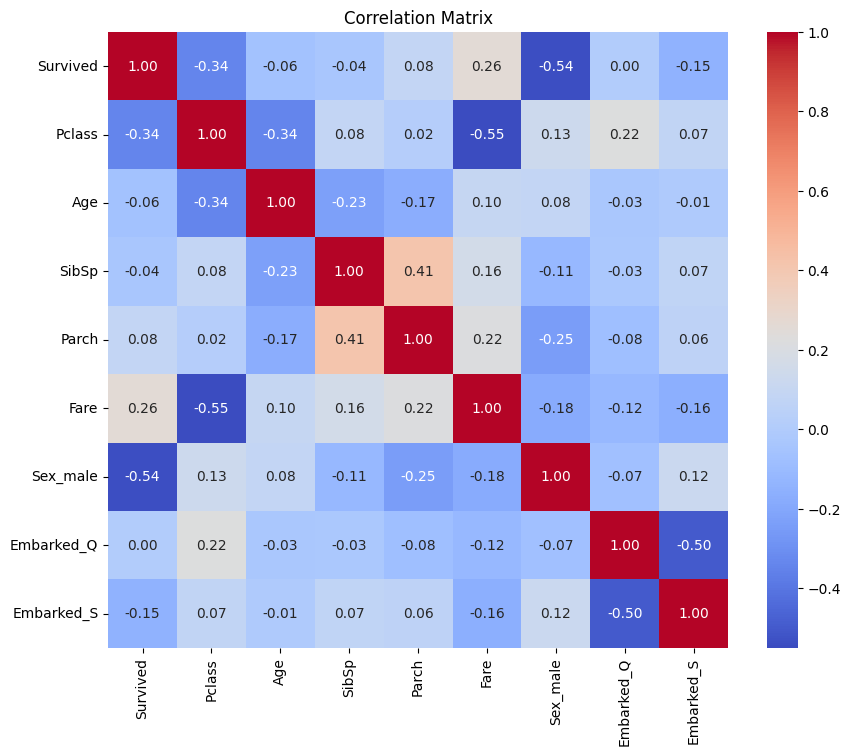

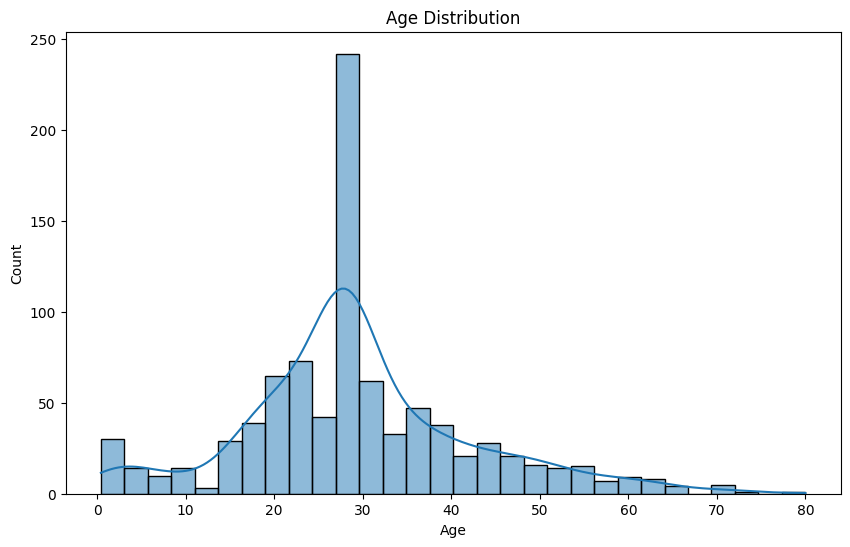

In [4]:
# Visualize correlation matrix


# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()




# Segment 3 : Feature Selection and Splitting Data
In this segment, i  performed feature selection and splitting data.



In [5]:
# Step 3: Feature Selection
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# Step 4: Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
331,1,45.5,0,0,28.5000,True,False,True
733,2,23.0,0,0,13.0000,True,False,True
382,3,32.0,0,0,7.9250,True,False,True
704,3,26.0,1,0,7.8542,True,False,True
813,3,6.0,4,2,31.2750,False,False,True


# Segment 4: Model Training and Evaluation
- In this segment, we will train and evaluate our machine learning model.
- We will use the GradientBoostingClassifier  algorithm for this task.


In [7]:

# Step 5: Choose a Machine Learning Model (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, random_state=8)

# Step 6: Train the Model
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=8)

# Step 7: Evaluate the Model

Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



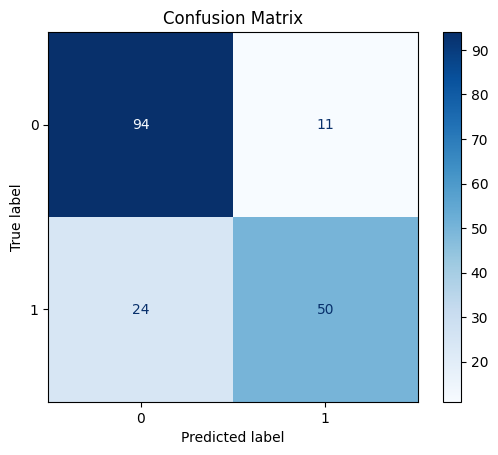

In [8]:

from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Segment 5: ROC Curve and Feature Importance
In this segment, we will discuss the ROC Curve and Feature Importance in Python.
ROC Curve

The ROC curve is a graphical representation of the performance of a binary classification model. It plots the True
Positive Rate (Sensitivity) against the False Positive Rate (1-Specificity) at different thresholds
The ROC curve is a useful tool for evaluating the performance of a binary classification model and for comparing the
performance of different models.



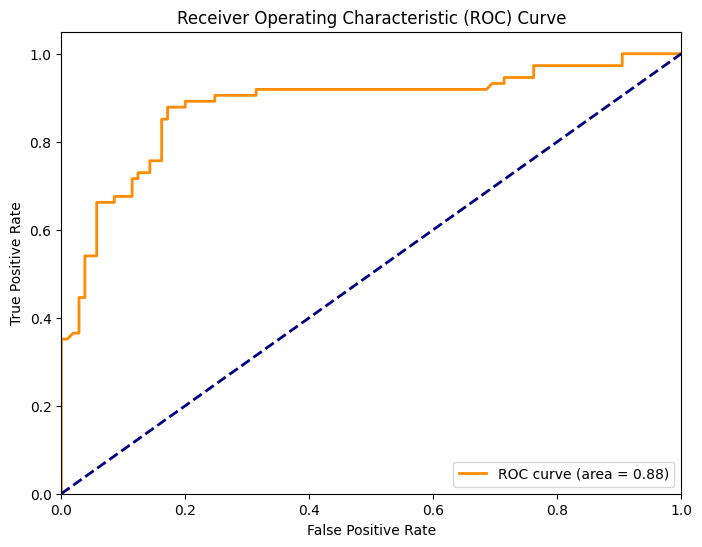

In [9]:
# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

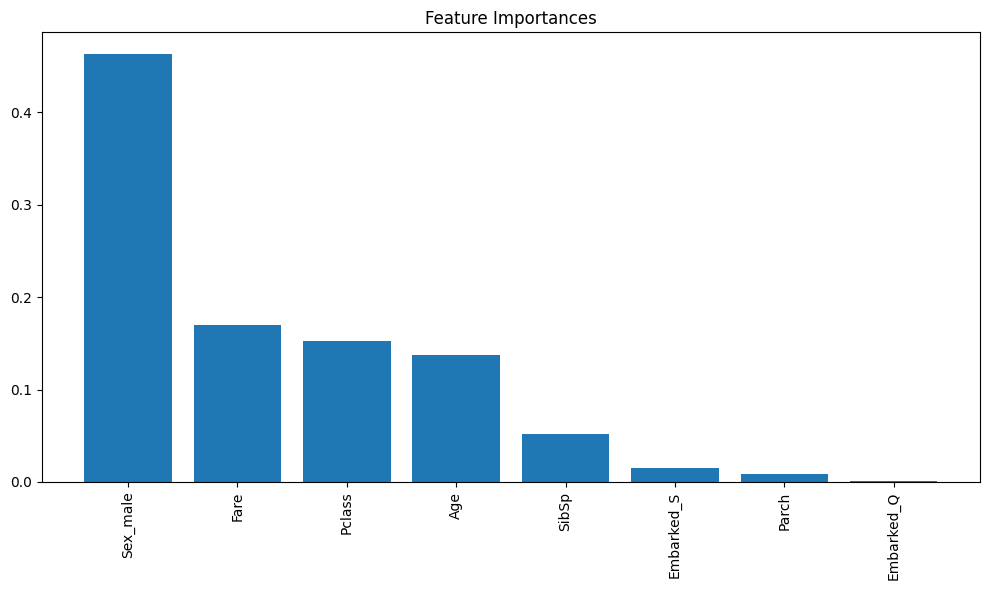

In [10]:
# Feature Importance
import numpy as np

feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


# Segment 6: Making Predictions


In [11]:
# Create new data for predictions
new_data = pd.DataFrame({
    'Pclass': [1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2],
    'Age': [22, 38, 26, 35, 19, 28, 31, 40, 33, 24, 42, 29],
    'SibSp': [2, 1, 3, 0, 2, 1, 0, 3, 2, 1, 3, 2],
    'Parch': [5, 0, 1, 2, 0, 3, 4, 2, 1, 0, 3, 2],
    'Fare': [41.25, 7.2833, 15.5, 30.0, 8.05, 21.6792, 27.0, 13.0, 10.5, 50.0, 12.475, 9.0],
    'Sex_male': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'Embarked_Q': [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
    'Embarked_S': [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1]
})
predictions = model.predict(new_data)

# Display predictions in a user-friendly format
for i, pred in enumerate(predictions):
    print(f"Passenger {i+1}: {'Survived' if pred == 1 else 'Did not survive'}")

Passenger 1: Did not survive
Passenger 2: Survived
Passenger 3: Did not survive
Passenger 4: Survived
Passenger 5: Did not survive
Passenger 6: Survived
Passenger 7: Did not survive
Passenger 8: Survived
Passenger 9: Did not survive
Passenger 10: Survived
Passenger 11: Did not survive
Passenger 12: Survived
